In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [2]:
df=pd.read_csv(r"C:\Users\Vikas\jupyter book\ex_files\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df.duplicated().sum()

0

In [9]:
# outlier 

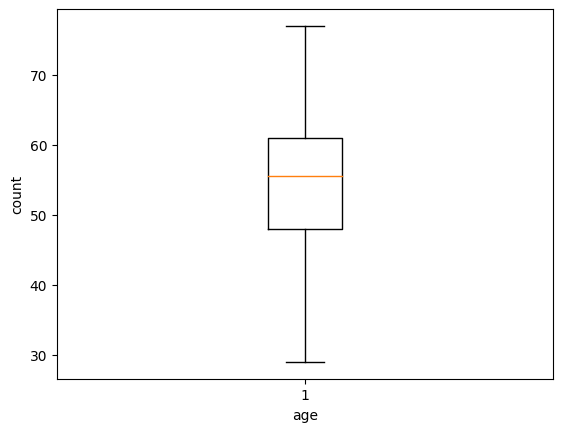

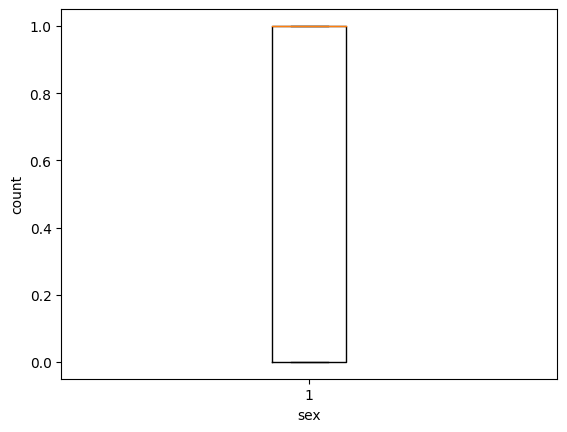

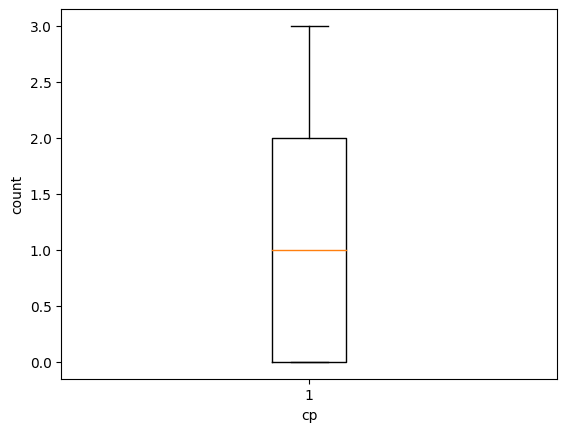

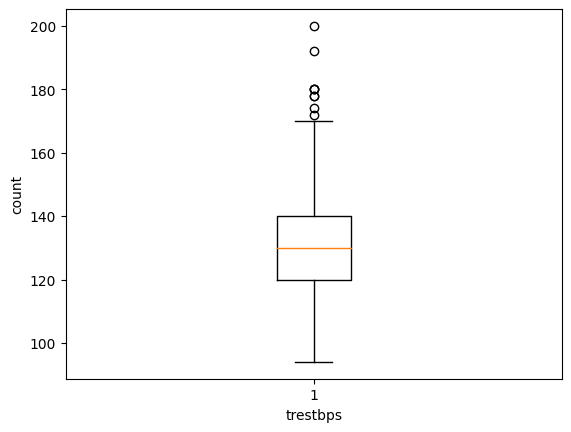

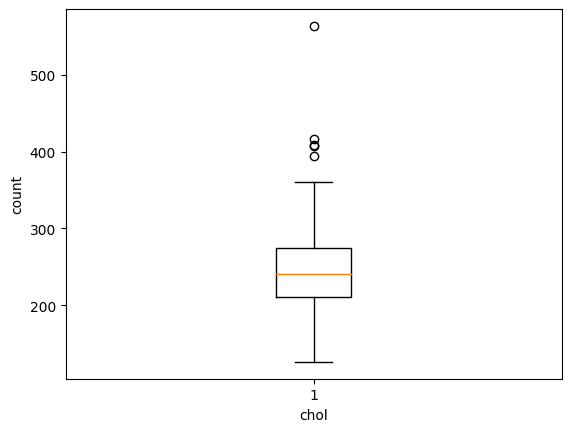

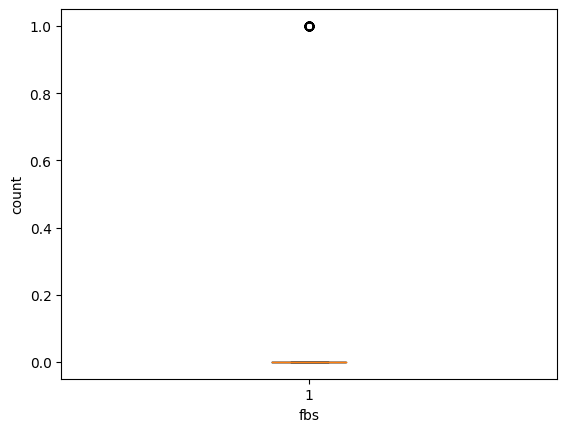

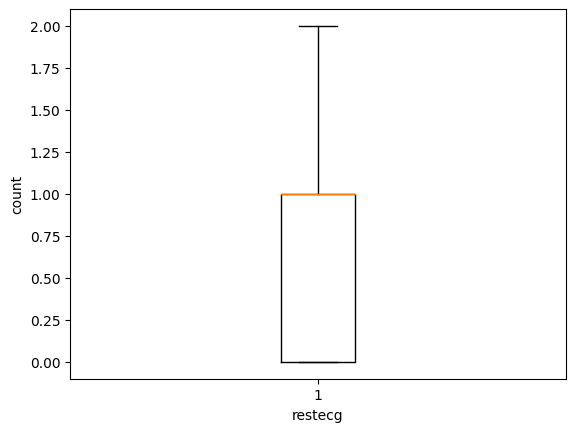

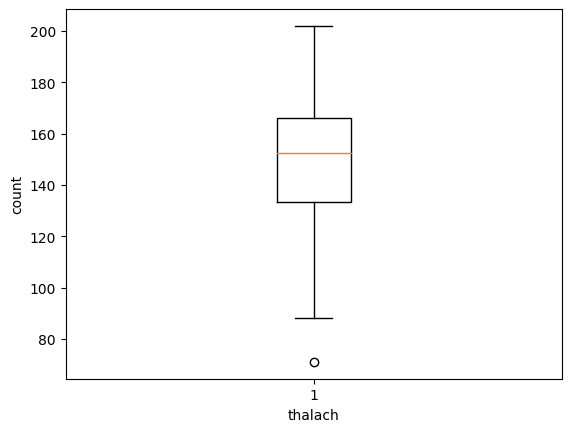

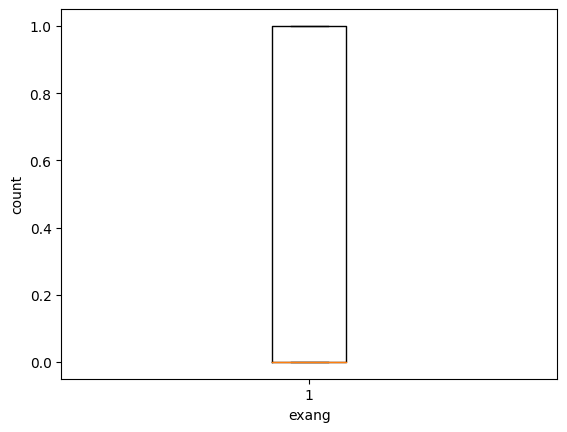

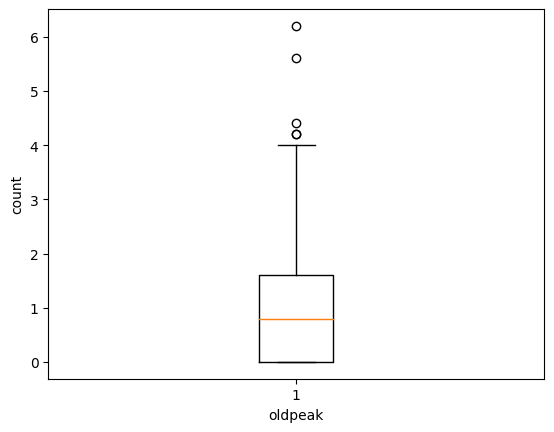

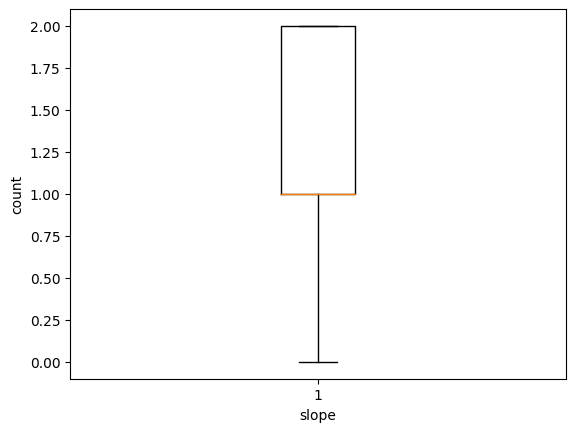

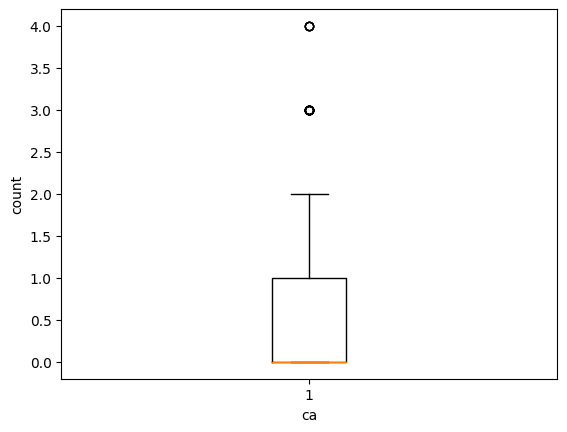

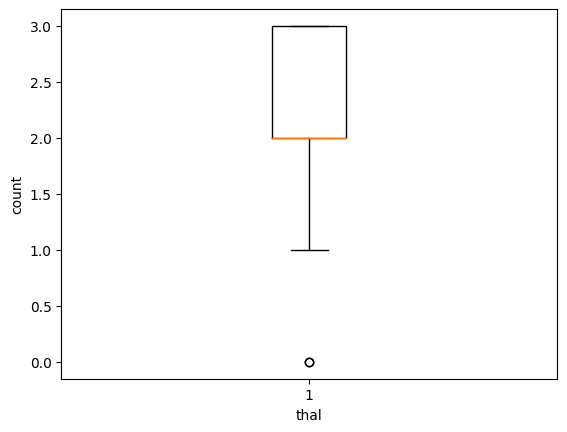

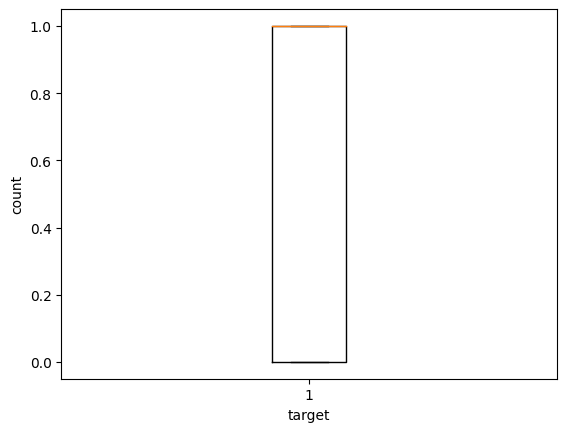

In [10]:
for i in df.columns:
    df[i].dtypes!="object"
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
        

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
out=["trestbps","chol","thalach","oldpeak","ca","thal"]

In [13]:
for i in out:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df=df[(df[i]>=ll)&(df[i]<=ul)]

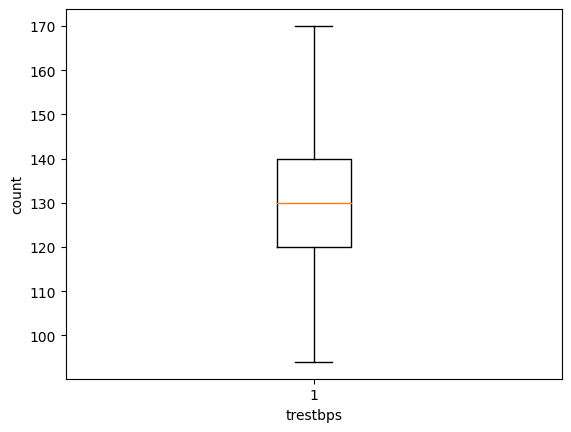

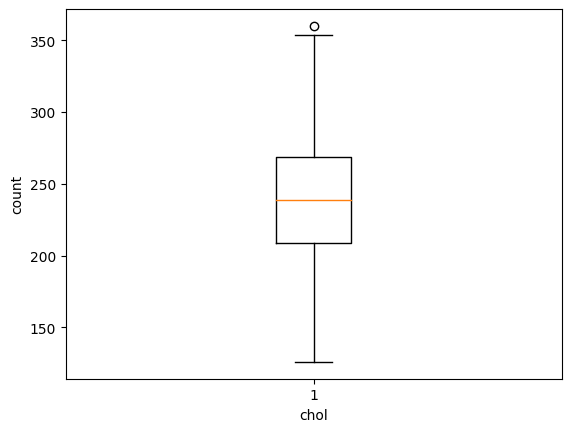

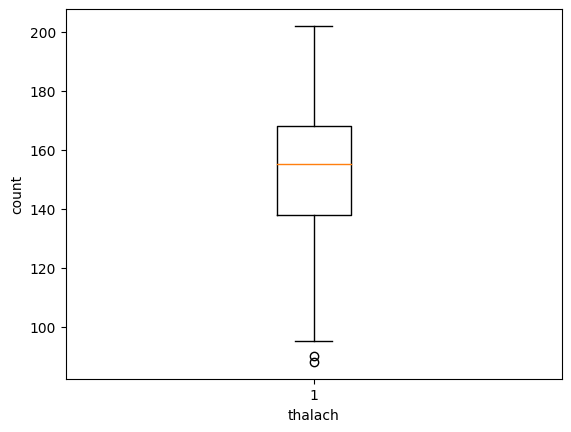

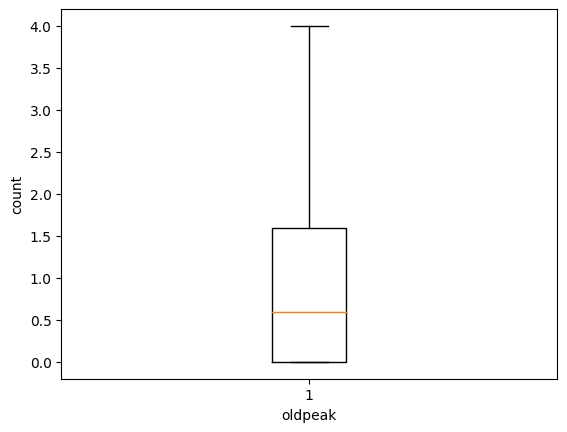

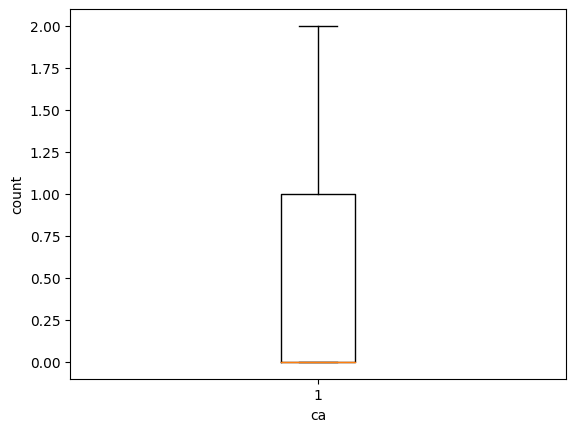

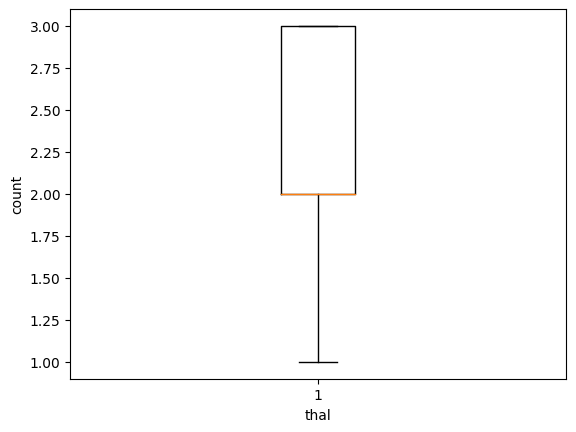

In [14]:
for i in out:
    df[i].dtypes!="object"
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()
        

# visualization

<AxesSubplot: xlabel='age', ylabel='Count'>

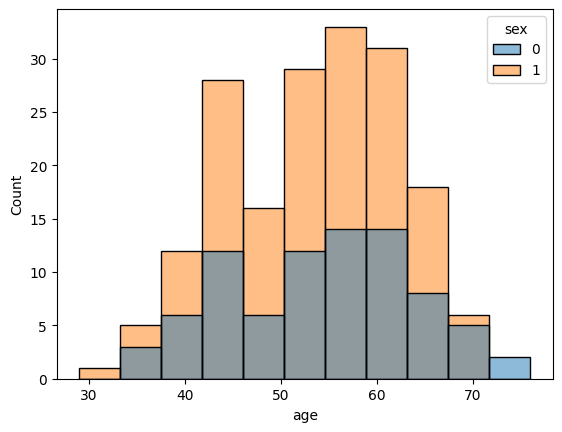

In [15]:
sns.histplot(data=df,x="age",hue="sex")


<AxesSubplot: xlabel='age', ylabel='Count'>

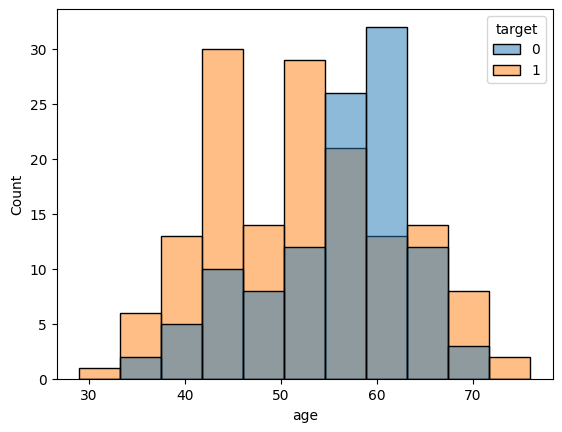

In [16]:
sns.histplot(data=df,x="age",hue="target")


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


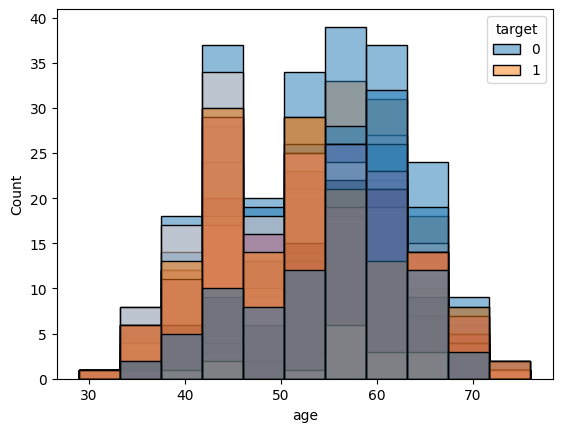

In [18]:
for i in df.columns:
    sns.histplot(data=df,x="age",hue=df[i])


In [19]:
# model building 

In [20]:
x=df.iloc[:,:-1]
y=df["target"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=67)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(max_depth=8,random_state=76)

In [24]:
dts.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=76)

In [25]:
p=dts.predict(x_test)

In [26]:
from sklearn.metrics import *

In [27]:
# accuracy score 1st predict value  2.actula value 
accuracy_score(p,y_test)

0.759493670886076

In [28]:
# confussion_matrix(predict value , actual value)
confusion_matrix(p,y_test)

array([[24,  9],
       [10, 36]], dtype=int64)

In [29]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        33
           1       0.80      0.78      0.79        46

    accuracy                           0.76        79
   macro avg       0.75      0.75      0.75        79
weighted avg       0.76      0.76      0.76        79



# trying making more efficient 

In [30]:
value=[1,2,3,4,5,6,7,8,9,1,21,3,14,15,16,17,18,19,20]


In [31]:
dfo=pd.DataFrame(columns=["max_depth","accuracy"])

In [32]:
dfo

,max_depth,accuracy


In [41]:
for i in value:
    dtso=DecisionTreeClassifier(max_depth=i,random_state=76)
    dtso.fit(x_train,y_train)
    p=dtso.predict(x_test)
    acc=accuracy_score(p,y_test)
    dfo=dfo.append({"max_depth":i ,"accuracy":acc}, ignore_index=True)
dfo

C:\Users\Vikas\AppData\Local\Temp\ipykernel_22976\2801573228.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfo=dfo.append({"max_depth":i ,"accuracy":acc}, ignore_index=True)
C:\Users\Vikas\AppData\Local\Temp\ipykernel_22976\2801573228.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfo=dfo.append({"max_depth":i ,"accuracy":acc}, ignore_index=True)
C:\Users\Vikas\AppData\Local\Temp\ipykernel_22976\2801573228.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfo=dfo.append({"max_depth":i ,"accuracy":acc}, ignore_index=True)
C:\Users\Vikas\AppData\Local\Temp\ipykernel_22976\2801573228.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

,max_depth,accuracy
0,1.0,0.797468
1,2.0,0.721519
2,3.0,0.822785
3,4.0,0.772152
4,5.0,0.797468
5,6.0,0.797468
6,7.0,0.759494
7,8.0,0.759494
8,9.0,0.759494
9,1.0,0.797468


In [46]:
dts1=DecisionTreeClassifier(max_depth=3,random_state=76)
dts1.fit(x_train,y_train)
p=dts1.predict(x_test)
acc=accuracy_score(p,y_test)

In [47]:
acc

0.8227848101265823